In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

N = 1000
primes = [2]
for i in range(3, N, 2):
    is_prime = True
    for j in range(3, int(np.sqrt(i)) + 1):
        if i % j == 0:
            is_prime = False
            break
    if is_prime:
        primes.append(i)

X = []
y = []
for i in range(2, N):
    v = []
    for p in prime:
        c = 0
        m = i
        while m % p == 0:
            m = m // p
            c += 1
        v.append(c)
    X.append(v)
    y.append('chet' if i % 2 == 0 else 'nechet')

<AxesSubplot:xlabel='t-SNE 1', ylabel='t-SNE 2'>

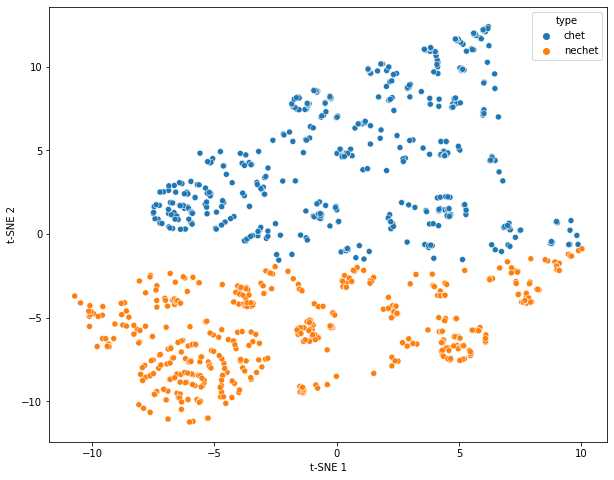

In [42]:
# TSNE 

model = TSNE(n_components = 2, perplexity = 50)
X1 = model.fit_transform(X)

df = pd.DataFrame()
df['t-SNE 1'] = X1[:, 0]
df['t-SNE 2'] = X1[:, 1]
df['type'] = y

fig = plt.gcf()
fig.set_size_inches(10, 8)

sns.scatterplot(
    x = 't-SNE 1', y = 't-SNE 2', 
    hue = 'type', data = df
)

<AxesSubplot:xlabel='PCA 1', ylabel='PCA 2'>

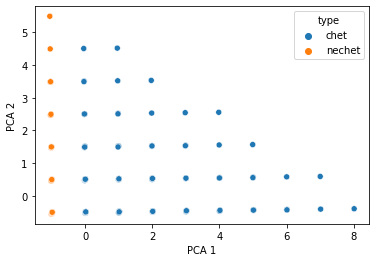

In [43]:
# PCA
model = PCA(n_components = 2)
X2 = model.fit_transform(X)

df = pd.DataFrame()
df['PCA 1'] = X2[:, 0]
df['PCA 2'] = X2[:, 1]
df['type'] = y

sns.scatterplot(
    x = 'PCA 1', y = 'PCA 2', 
    hue = 'type', data = df
)

<AxesSubplot:xlabel='t-SNE 1', ylabel='t-SNE 2'>

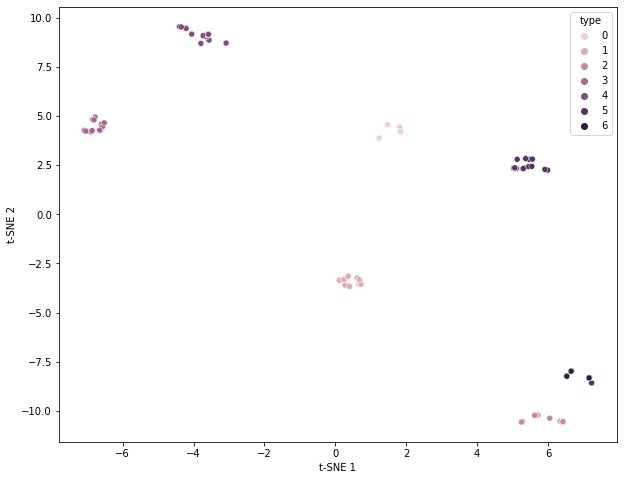

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
     

df = pd.read_csv('human_coronavirus_aln_scores.tsv', sep = '\t', index_col = 0)
X = 5000 - df

model = TSNE(n_components = 2, perplexity = 30, metric = 'precomputed')
X = model.fit_transform(X)
n, _ = df.shape

df['t-SNE 1'] = X[:, 0]
df['t-SNE 2'] = X[:, 1]
df['type'] = [abs(i - 1)//20 for i in range(n)]

fig = plt.gcf()
fig.set_size_inches(10, 8)

sns.scatterplot(x = 't-SNE 1', y = 't-SNE 2', hue = 'type', data = df)

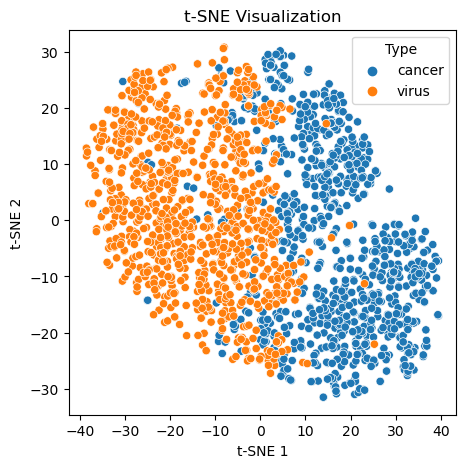

In [1]:
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA 
 
import matplotlib.pyplot as plt 
import seaborn as sns 
      
cancer = pd.read_csv('csv-cancer-set.csv', index_col = 0).fillna('-') 
virus = pd.read_csv('csv-virus-set.csv', index_col = 0).fillna('-') 
title = cancer[:1000]['Title'].to_list() + virus[:1000]['Title'].to_list() 
vectors = ['cancer']*1000 + ['virus']*1000 
 
X = CountVectorizer().fit_transform(title) 
 
model = TSNE(n_components = 2, perplexity = 30, init = "random") 
X = model.fit_transform(X) 
 
df = pd.DataFrame() 
df['t-SNE 1'], df['t-SNE 2'] = X[:, 0], X[:, 1] 
df['vectors'] = vectors 
 
sns.scatterplot( 
    x = 't-SNE 1', y = 't-SNE 2', hue = 'vectors',  
    data = df 
)

from sklearn.decomposition import TruncatedSVD 
X2 = CountVectorizer().fit_transform(title) 
 
model2 = TruncatedSVD(n_components = 2) 
X2 = model.fit_transform(X2) 
 
df2 = pd.DataFrame() 
df2['SVD 1'] = X2[:, 0] 
df2['SVD 2'] = X2[:, 1] 
df2['vectors'] = vectors 
 
sns.scatterplot( 
    x = 'SVD 1', y = 'SVD 2', hue = 'vectors',  
    data = df 
)

In [40]:
import pandas as pd
cancer = pd.read_csv('csv-cancer-set.csv')[:1000].fillna('-') 
virus = pd.read_csv('csv-virus-set.csv')[:1000].fillna('-') 
# используем расстоянием жаккарда

titles_cancer = cancer['Title'].tolist()
titles_virus = virus['Title'].tolist()
titles_cancer = [str(i) for i in titles_cancer]
titles_virus = [str(i) for i in titles_virus]

def jaccard(set1, set2):
    intersection = len(set1&set2)
    union = len(set1|set2)
    distance = 1 - (intersection / union)
    return distance

distance_matrix = []
for i in range(len(titles_cancer)):
    row = []
    for j in range(len(titles_virus)):
        title_cancer = set(titles_cancer[i].split()) 
        title_virus = set(titles_virus[j].split()) 
        distance = jaccard(title_cancer, title_virus)
        row.append(distance)
    distance_matrix.append(row)

df = pd.DataFrame(distance_matrix, columns=titles_virus, index=titles_cancer)

print(df)

                                                    A Literature Review of Zika Virus   
Cancer and cure: A critical analysis                                         0.909091  \
Mapping cancer origins                                                       1.000000   
Tumor microenvironment: recent advances in vari...                           1.000000   
Cancer's new normal                                                          1.000000   
Cancer prevention: from 1727 to milestones of t...                           0.937500   
...                                                                               ...   
Population study of expression of thymidylate s...                           0.947368   
Cathepsin D in the Tumor Microenvironment of Br...                           0.937500   
Identification of Hürthle cell cancers: solving...                           0.954545   
L-methionase: a therapeutic enzyme to treat mal...                           1.000000   
Understanding and tar

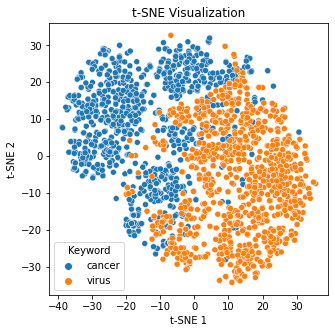

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns

df_cancer = pd.read_csv('csv-virus-set.csv', index_col = 0).fillna('-')[:1000]
df_virus = pd.read_csv('csv-cancer-set.csv', index_col = 0).fillna('-')[:1000]

titles_cancer = df_cancer['Title'].tolist()
titles_virus = df_virus['Title'].tolist()

all_titles = titles_cancer + titles_virus

vectorizer = CountVectorizer()
vectorized_titles = vectorizer.fit_transform(all_titles).toarray()

# Применение PCA для снижения размерности данных
pca = PCA(n_components=50)
reduced_features = pca.fit_transform(vectorized_titles)

# Применение t-SNE на сниженных признаках
model_tsne = TSNE(n_components=2, perplexity=50)
X_tsne = model_tsne.fit_transform(reduced_features)

df_tsne = pd.DataFrame(X_tsne, columns=['t-SNE 1', 't-SNE 2'])
df_tsne['Type'] = ['cancer'] * len(titles_cancer) + ['virus'] * len(titles_virus)

plt.figure(figsize=(5, 5))
sns.scatterplot(x='t-SNE 1', y='t-SNE 2', hue='Type', data=df_tsne)
plt.title('t-SNE Visualization')
plt.show()